In [1]:
pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall:

In [2]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# EDA

In [4]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [7]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [8]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [9]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


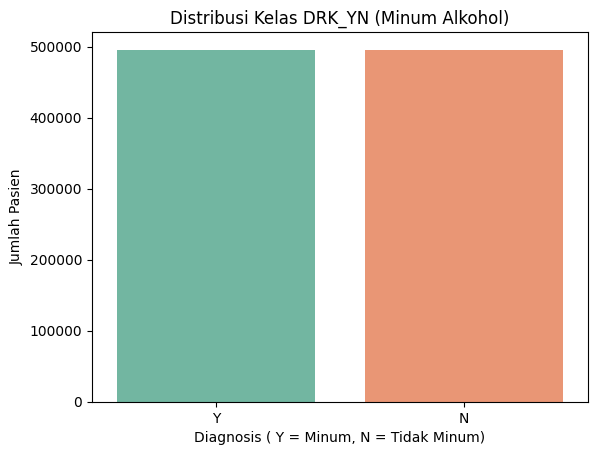

In [10]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [11]:
kolom_numerik = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

kolom_kategorikal_nominal = ['sex']
kolom_kategorikal_ordinal = ['hear_left', 'hear_right', 'SMK_stat_type_cd', 'urine_protein']
kolom_target = 'DRK_YN'

cek outlier metode *IQR*

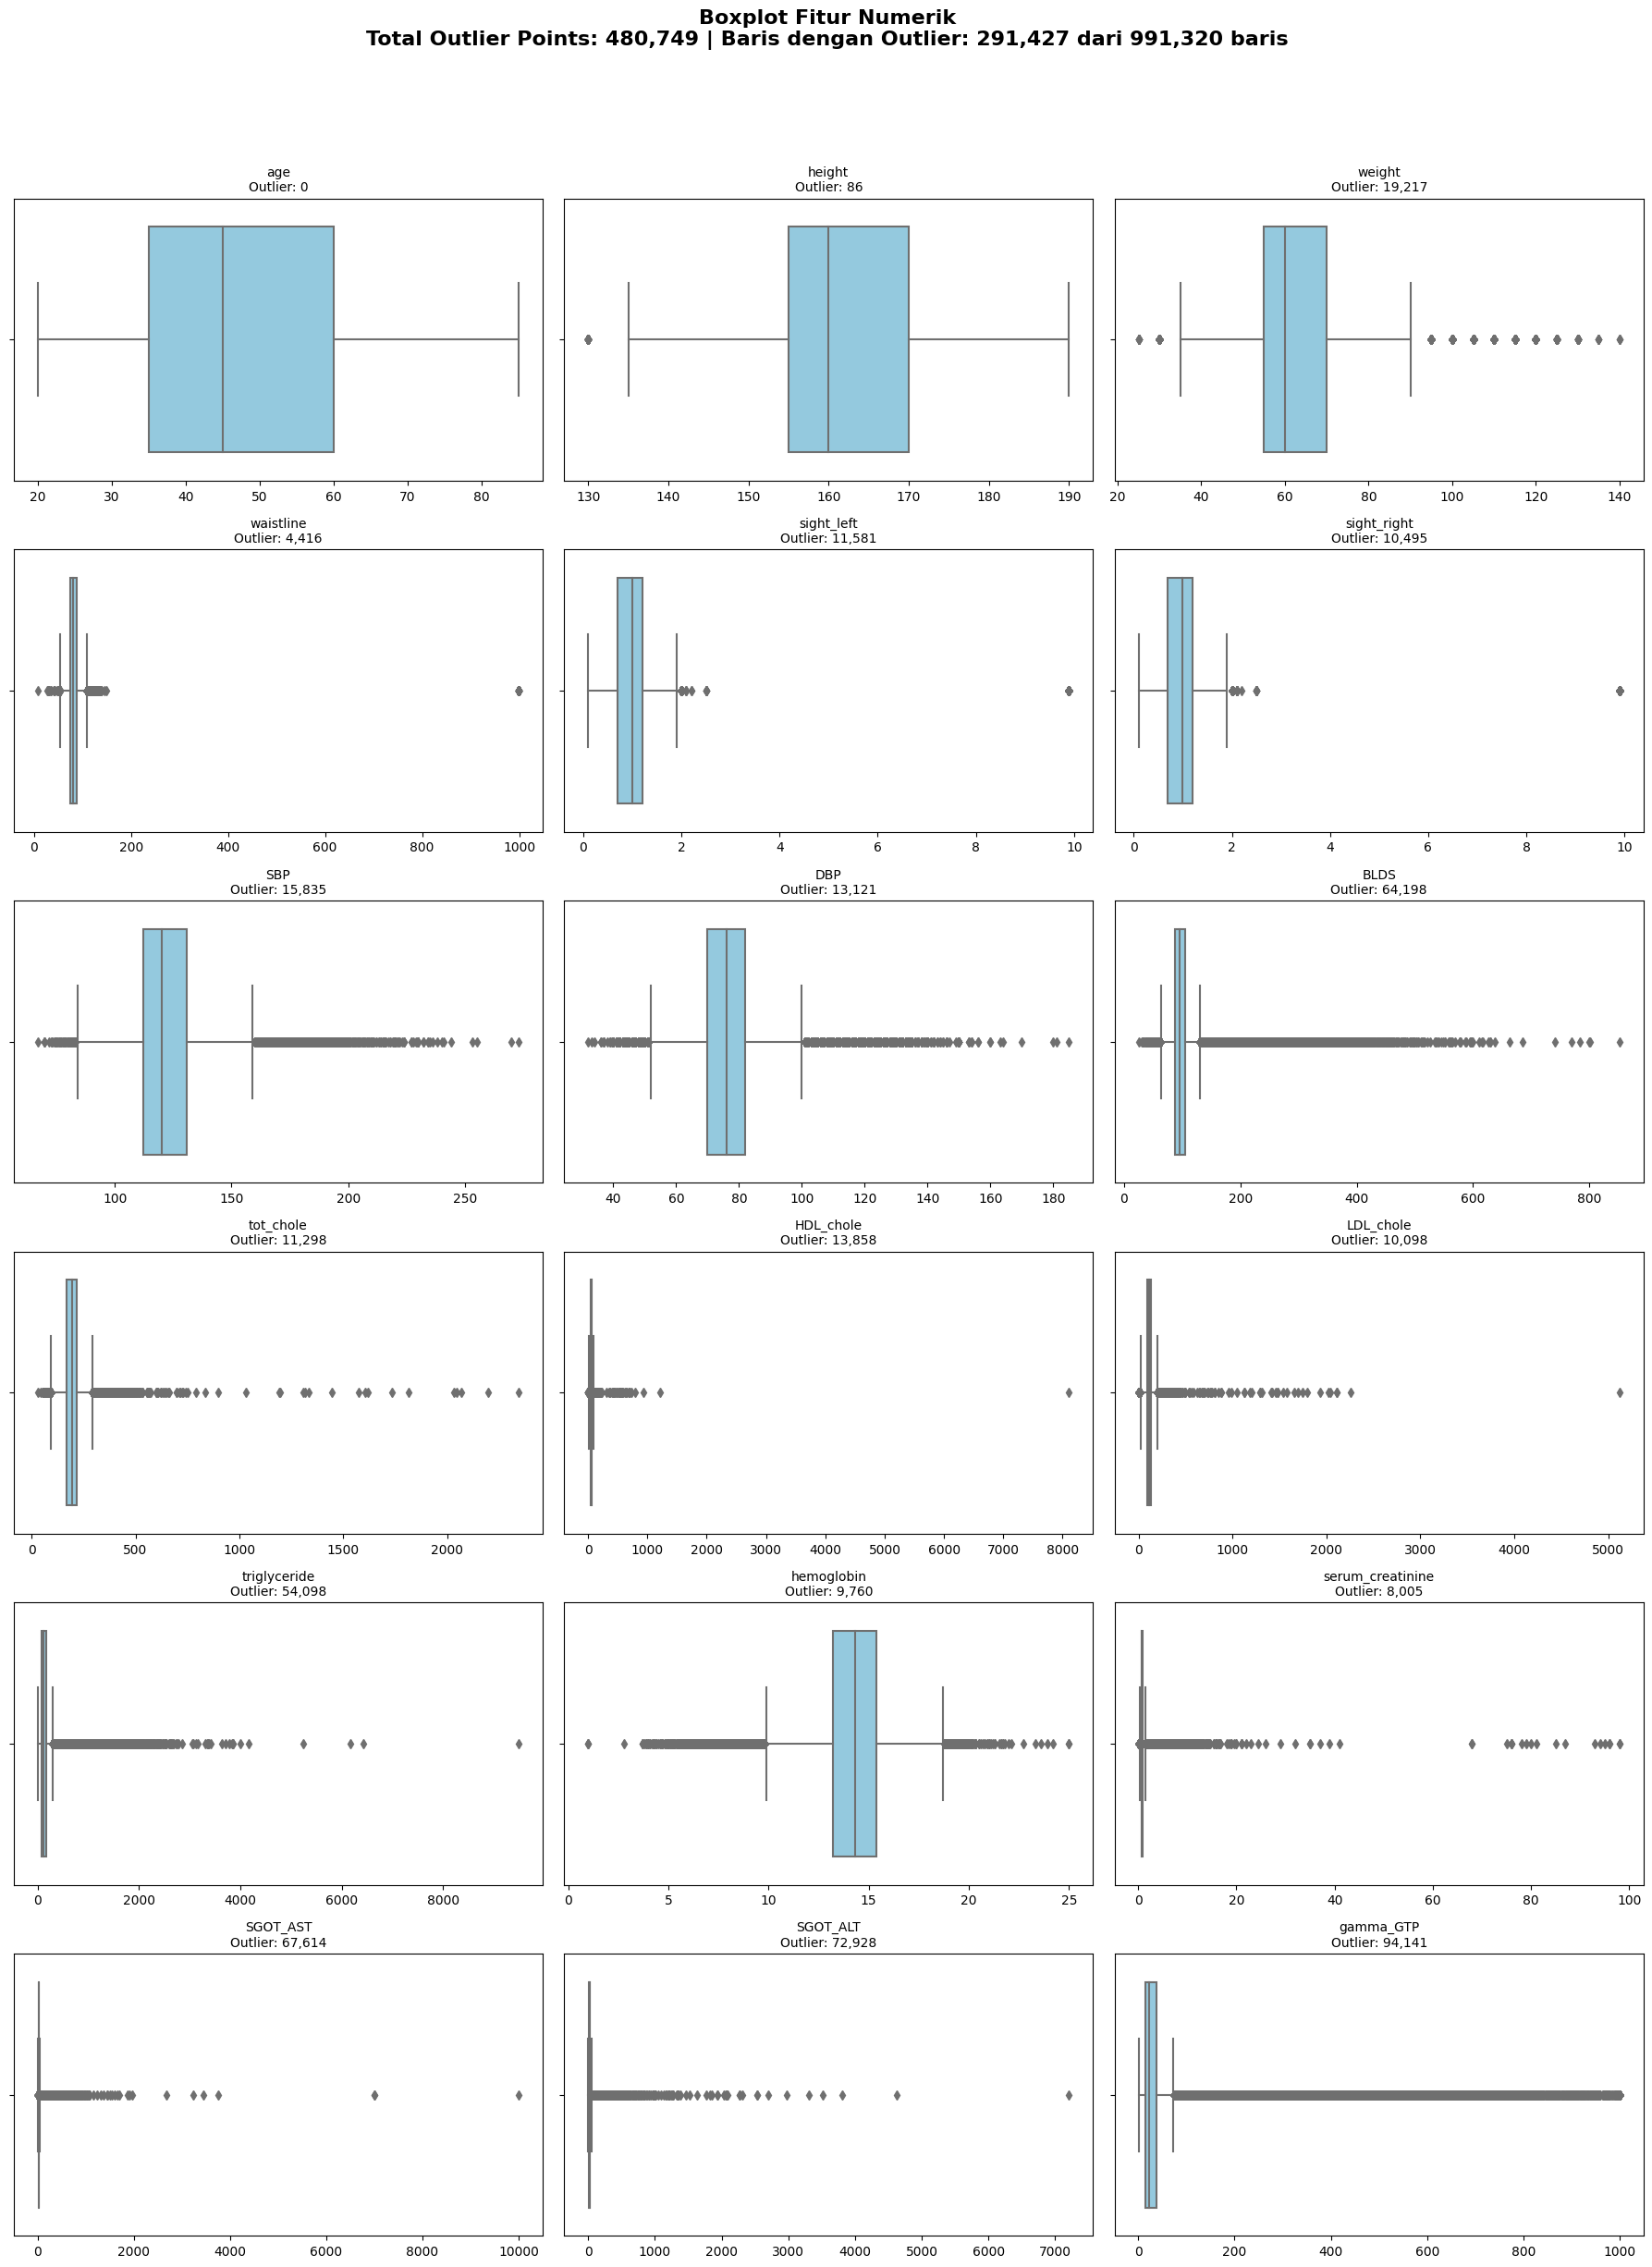

In [12]:
# Fungsi deteksi outlier berdasarkan IQR
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (df[col] < low) | (df[col] > high)

outlier_info = {}
total_outlier_points = 0
outlier_rows = pd.Series(False, index=df.index)

for col in kolom_numerik:
    mask_outlier = detect_outliers_iqr(df, col)
    n_outlier = mask_outlier.sum()
    outlier_info[col] = n_outlier
    total_outlier_points += n_outlier
    outlier_rows |= mask_outlier 

total_outlier_rows = outlier_rows.sum()

n_cols = 3
n_rows = int(np.ceil(len(kolom_numerik) / n_cols))

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, col in enumerate(kolom_numerik):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col}\nOutlier: {outlier_info[col]:,}", fontsize=10)
    plt.xlabel("")

plt.suptitle(
    f"Boxplot Fitur Numerik\nTotal Outlier Points: {total_outlier_points:,} | "
    f"Baris dengan Outlier: {total_outlier_rows:,} dari {len(df):,} baris",
    fontsize=16, fontweight='bold', y=1.02
)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Terapkan Winsorization (1%–99%)

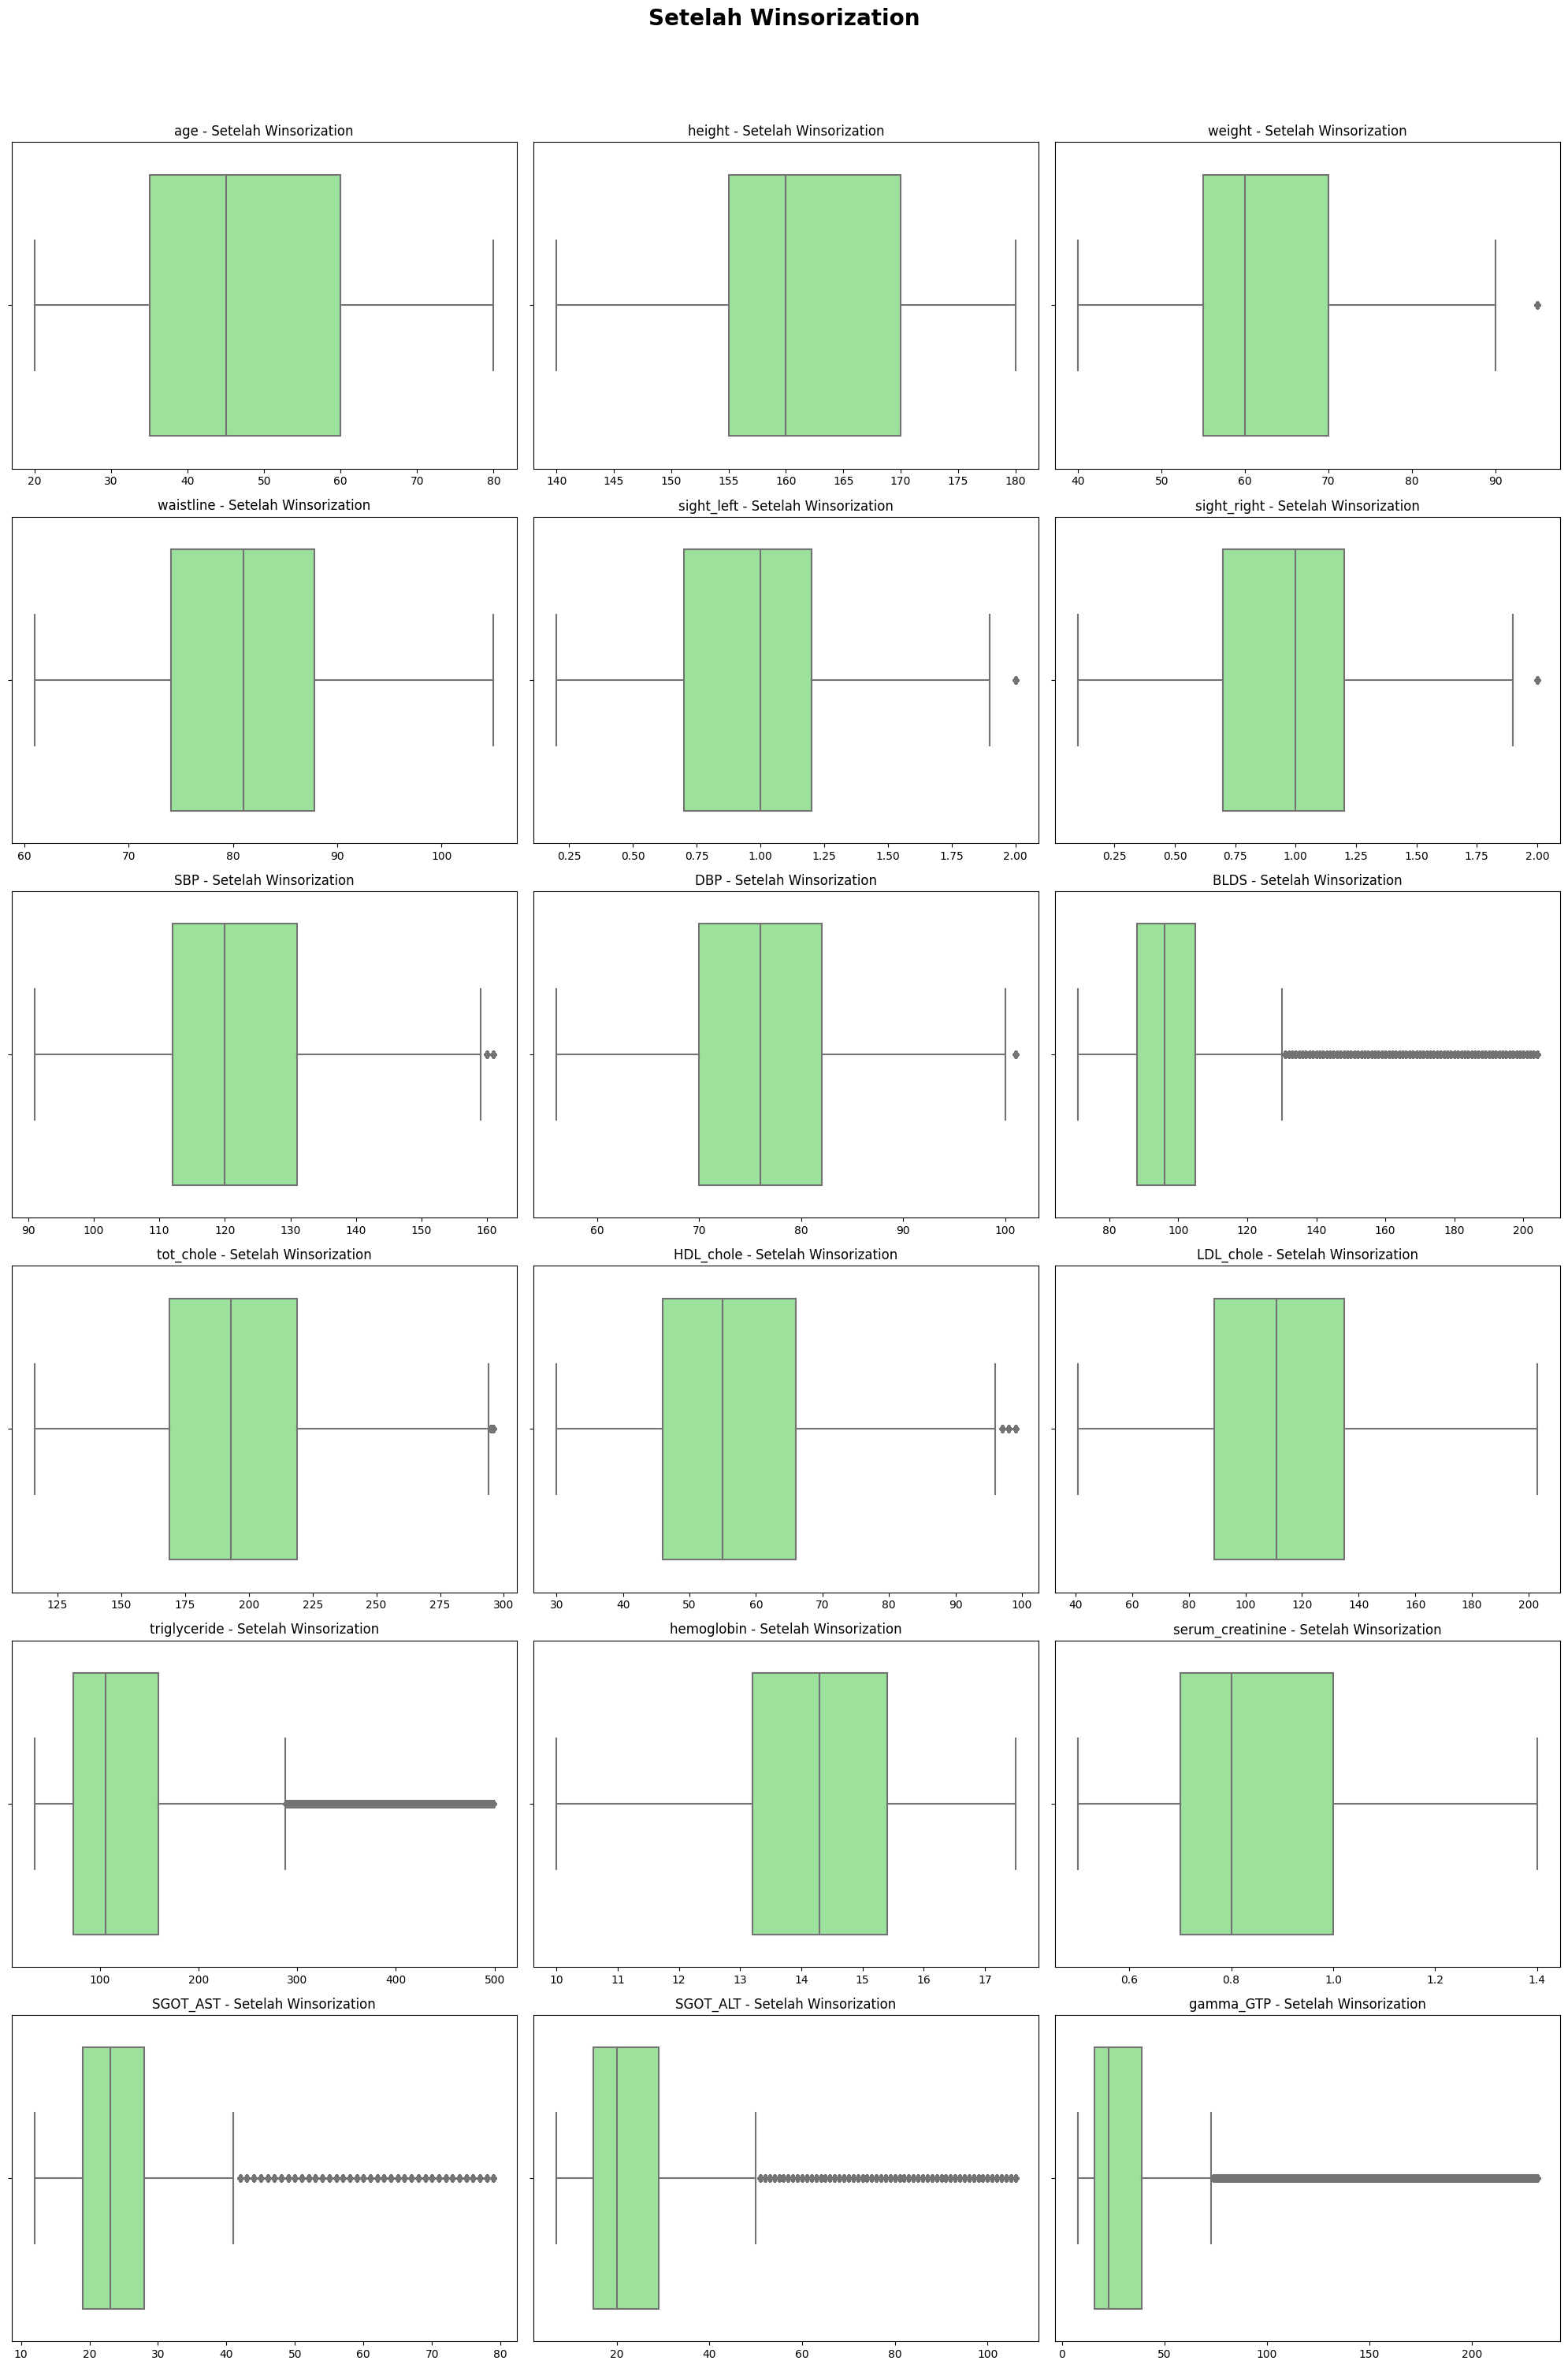

In [13]:
# Winsorization (potong outlier ekstrem di quantile 1% dan 99%)
for col in outlier_info:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df.loc[:, col] = np.clip(df[col], lower, upper)

plt.figure(figsize=(20, 30))
for i, col in enumerate(outlier_info):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} - Setelah Winsorization", fontsize=12)
    plt.xlabel("")

plt.suptitle("Setelah Winsorization", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [14]:
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (df[col] < low) | (df[col] > high)

print("\n Pengecekan Ulang Outlier Setelah Winsorization")
kolom_sisa_outlier = []
for col in outlier_info:
    if detect_outliers_iqr(df, col).sum() > 0:
        kolom_sisa_outlier.append(col)

if len(kolom_sisa_outlier) == 0:
    print("Tidak ada outlier yang tersisa berdasarkan metode IQR.")
else:
    print(f"Masih ada {len(kolom_sisa_outlier)} kolom yang mengandung outlier setelah Winsorization:")
    print(kolom_sisa_outlier)


 Pengecekan Ulang Outlier Setelah Winsorization
Masih ada 12 kolom yang mengandung outlier setelah Winsorization:
['weight', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'triglyceride', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']


In [15]:
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (df[col] < low) | (df[col] > high)

print("Jumlah Outlier yang Tersisa per Kolom : ")
for col in kolom_sisa_outlier:
    jumlah_outlier = detect_outliers_iqr(df, col).sum()
    print(f"Kolom '{col}': {jumlah_outlier} outlier")

Jumlah Outlier yang Tersisa per Kolom : 
Kolom 'weight': 19051 outlier
Kolom 'sight_left': 11581 outlier
Kolom 'sight_right': 10495 outlier
Kolom 'SBP': 15349 outlier
Kolom 'DBP': 10868 outlier
Kolom 'BLDS': 62755 outlier
Kolom 'tot_chole': 10577 outlier
Kolom 'HDL_chole': 13708 outlier
Kolom 'triglyceride': 54098 outlier
Kolom 'SGOT_AST': 67498 outlier
Kolom 'SGOT_ALT': 72928 outlier
Kolom 'gamma_GTP': 94141 outlier


Capping berhasil dilakukan untuk semua kolom.


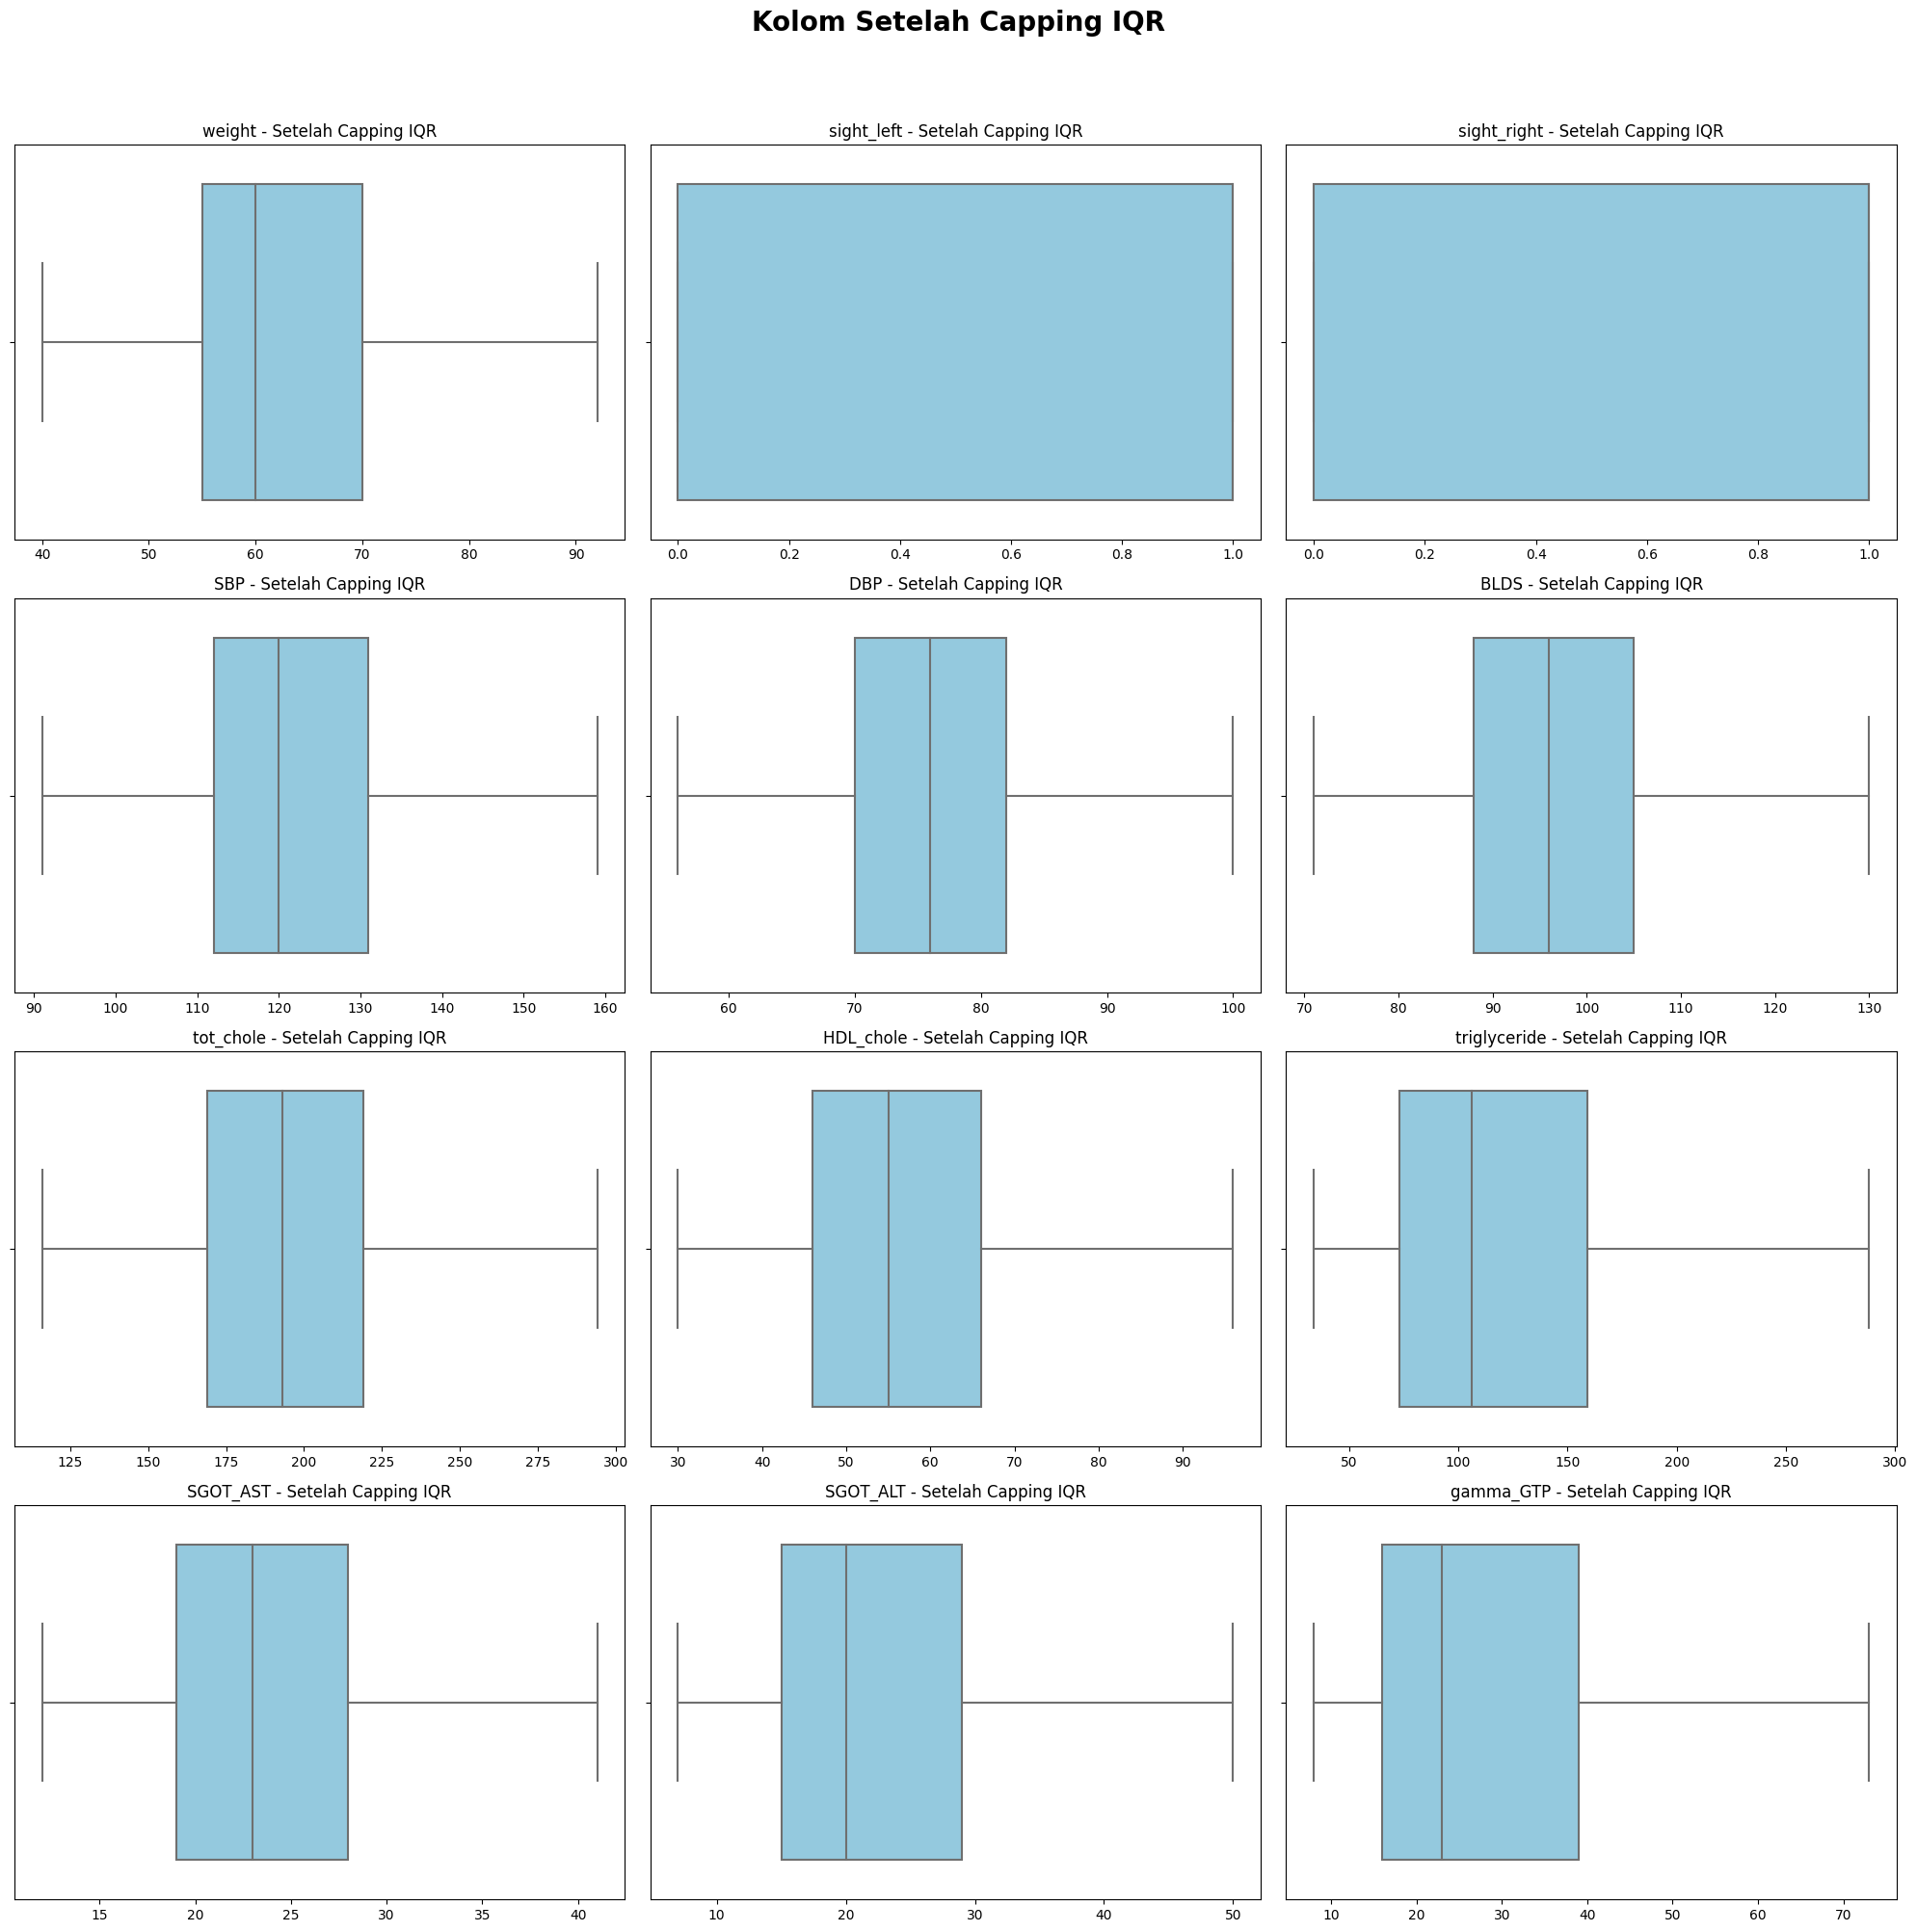


 Pengecekan Ulang Outlier Setelah Capping 
Tidak ada outlier yang tersisa.


In [16]:
for col in kolom_sisa_outlier:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Melakukan capping dan mengkonversi kembali ke tipe data integer
    # Ini mengatasi FutureWarning
    df.loc[:, col] = np.clip(df[col], lower_limit, upper_limit).astype(int)

print("Capping berhasil dilakukan untuk semua kolom.")

plt.figure(figsize=(20, 20))
num_plots = len(kolom_sisa_outlier)
rows = (num_plots + 2) // 3
for i, col in enumerate(kolom_sisa_outlier):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} - Setelah Capping IQR", fontsize=12)
    plt.xlabel("")

plt.suptitle("Kolom Setelah Capping IQR", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (df[col] < low) | (df[col] > high)

print("\n Pengecekan Ulang Outlier Setelah Capping ")
kolom_sisa_outlier_lagi = []
for col in kolom_sisa_outlier:
    if detect_outliers_iqr(df, col).sum() > 0:
        kolom_sisa_outlier_lagi.append(col)

if len(kolom_sisa_outlier_lagi) == 0:
    print("Tidak ada outlier yang tersisa.")
else:
    print(f"Masih ada {len(kolom_sisa_outlier_lagi)} kolom yang mengandung outlier.")
    print(kolom_sisa_outlier_lagi)

# Processing

In [17]:
df_encoded = df.copy()

In [18]:
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1}).astype(int)

In [19]:
df_encoded['DRK_YN'].unique()

array([1, 0])

In [20]:
X = df_encoded.drop('DRK_YN', axis=1)
y = df_encoded['DRK_YN']

In [21]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


Train : (693924, 23)
Val   : (99132, 23)
Test  : (198264, 23)


In [22]:
print("Proporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("Proporsi kelas di y_val:")
print(y_val.value_counts(normalize=True))
print("Proporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Proporsi kelas di y_train:
DRK_YN
0    0.500186
1    0.499814
Name: proportion, dtype: float64
Proporsi kelas di y_val:
DRK_YN
0    0.500182
1    0.499818
Name: proportion, dtype: float64
Proporsi kelas di y_test:
DRK_YN
0    0.500187
1    0.499813
Name: proportion, dtype: float64


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kolom_kategorikal_nominal:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col]) 

In [24]:
df_encoded

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.0,1.0,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.0,1.0,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,41.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.0,1.0,1.0,1.0,145.0,...,104.0,106.0,17.5,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.0,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.0,1.0,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.0,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.0,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.0,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


## Seleksi Fitur

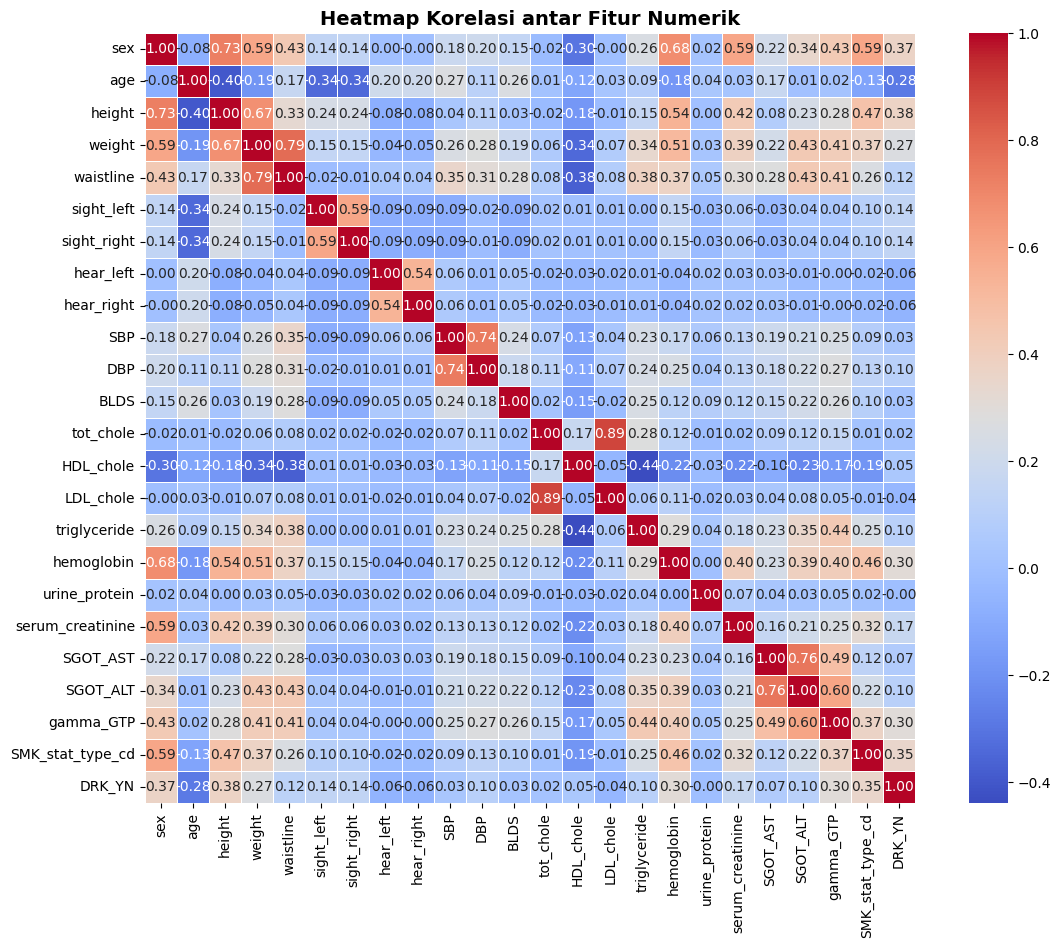

In [25]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, weight='bold')
plt.show()

In [26]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Fitur 1', 'Fitur 2', 'Korelasi']
high_corr = high_corr[high_corr['Korelasi'].abs() > 0.85].sort_values(by='Korelasi', ascending=False)

print("Pasangan fitur numerik dengan korelasi tinggi (> 0.85):")
display(high_corr)

Pasangan fitur numerik dengan korelasi tinggi (> 0.85):


,Fitur 1,Fitur 2,Korelasi
211,tot_chole,LDL_chole,0.893048


In [27]:
numerik = ['age', 'height', 'weight', 'waistline','sight_left', 'sight_right',
           'SBP', 'DBP', 'BLDS','tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
           'serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

scaler = RobustScaler()

X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])
X_val[numerik] = scaler.transform(X_val[numerik])

In [28]:
X_train.head(20)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
565920,0,-0.8,-0.666667,-0.333333,-0.882353,0.0,0.0,1.0,1.0,-0.526316,...,0.30,0.326087,-0.500000,-0.545455,1.0,0.000000,-0.222222,-0.357143,-0.391304,1.0
616392,0,-0.8,0.333333,-1.000000,-1.397059,0.0,0.0,1.0,1.0,-0.736842,...,-0.25,-0.173913,-0.465116,-0.363636,1.0,-0.333333,-0.333333,-0.928571,-0.391304,1.0
294123,1,0.2,0.666667,1.666667,0.794118,0.0,-1.0,1.0,1.0,0.052632,...,-1.00,-0.217391,2.093023,0.636364,1.0,0.333333,-0.111111,0.714286,0.347826,2.0
659006,0,0.2,-0.333333,-1.000000,-1.213235,0.0,0.0,1.0,1.0,-1.421053,...,0.75,-0.108696,-0.197674,-1.454545,1.0,-0.333333,-0.111111,0.071429,-0.217391,1.0
240093,0,1.2,-0.666667,1.000000,1.764706,-1.0,-1.0,1.0,1.0,0.684211,...,-0.90,-0.282609,0.348837,-0.318182,1.0,-0.333333,-0.333333,0.000000,-0.391304,1.0
62632,0,-0.6,-0.333333,-0.666667,-0.941176,0.0,0.0,1.0,1.0,-1.263158,...,0.60,-0.695652,-0.581395,-0.818182,1.0,0.333333,-0.333333,-0.642857,-0.565217,1.0
662507,1,0.2,0.333333,1.000000,0.147059,0.0,-1.0,1.0,1.0,0.631579,...,-0.60,1.108696,0.674419,1.000000,1.0,1.333333,0.444444,1.428571,1.956522,3.0
135999,1,-0.2,0.333333,1.333333,0.294118,-1.0,-1.0,1.0,1.0,1.789474,...,-0.05,0.608696,-0.034884,0.363636,1.0,0.666667,0.666667,0.428571,-0.130435,2.0
836383,0,1.0,-0.666667,0.333333,0.323529,-1.0,0.0,1.0,1.0,1.052632,...,0.50,1.065217,0.534884,0.636364,1.0,-0.333333,-0.888889,0.357143,-0.130435,1.0
232221,1,0.6,0.333333,1.000000,1.250000,0.0,0.0,1.0,1.0,-0.105263,...,-0.35,0.326087,-0.569767,-0.272727,1.0,0.000000,-0.333333,-0.500000,1.043478,2.0


# Model

## 1D CNN

In [29]:
X_train = X_train.to_numpy().astype('float32')
X_val   = X_val.to_numpy().astype('float32')
X_test  = X_test.to_numpy().astype('float32')

y_train = y_train.to_numpy().astype('float32')
y_val   = y_val.to_numpy().astype('float32')
y_test  = y_test.to_numpy().astype('float32')

In [30]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn   = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (693924, 23, 1)
X_val_cnn: (99132, 23, 1)
X_test_cnn: (198264, 23, 1)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

2025-08-06 07:14:14.300896: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-06 07:14:14.300963: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-06 07:14:14.301018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 32)            192       
                                                                 
 batch_normalization (Batch  (None, 23, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 23, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 23, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 23, 64)            0

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

model_ckpt = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=100,
    batch_size=256,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)

Epoch 1/100
2710/2711 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7226 - auc: 0.7988
Epoch 1: val_loss improved from inf to 0.53059, saving model to best_model.h5
2711/2711 [==============================] - 88s 31ms/step - loss: 0.5447 - accuracy: 0.7226 - auc: 0.7988 - val_loss: 0.5306 - val_accuracy: 0.7338 - val_auc: 0.8161
Epoch 2/100
   5/2711 [..............................] - ETA: 1:20 - loss: 0.5208 - accuracy: 0.7344 - auc: 0.8167

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2711 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.7306 - auc: 0.8089
Epoch 2: val_loss improved from 0.53059 to 0.52333, saving model to best_model.h5
2711/2711 [==============================] - 85s 31ms/step - loss: 0.5323 - accuracy: 0.7306 - auc: 0.8089 - val_loss: 0.5233 - val_accuracy: 0.7339 - val_auc: 0.8174
Epoch 3/100
2711/2711 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.7309 - auc: 0.8104
Epoch 3: val_loss did not improve from 0.52333
2711/2711 [==============================] - 84s 31ms/step - loss: 0.5306 - accuracy: 0.7309 - auc: 0.8104 - val_loss: 0.5277 - val_accuracy: 0.7355 - val_auc: 0.8179
Epoch 4/100
2711/2711 [==============================] - ETA: 0s - loss: 0.5293 - accuracy: 0.7323 - auc: 0.8115
Epoch 4: val_loss improved from 0.52333 to 0.52297, saving model to best_model.h5
2711/2711 [==============================] - 85s 31ms/step - loss: 0.5293 - accuracy: 0.7323 - auc: 0.8115 - val_loss: 0.5230 - 

6196/6196 [==============================] - 13s 2ms/step
Classification Report (CNN - Test Set):
              precision    recall  f1-score   support

          No       0.75      0.73      0.74     99169
         Yes       0.73      0.75      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



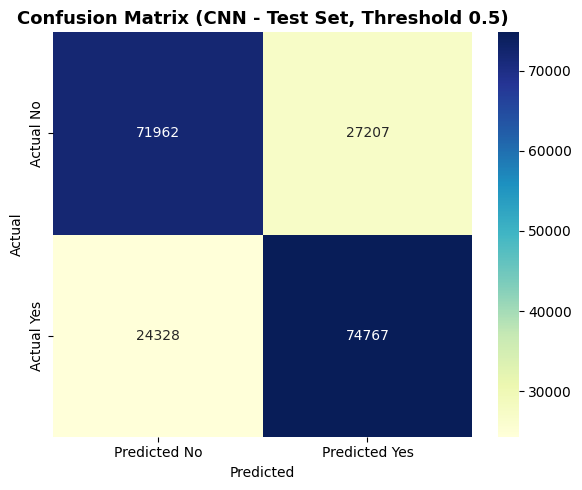

In [33]:
y_test_proba = model.predict(X_test_cnn)
y_test_pred = (y_test_proba > 0.5).astype(int).flatten()

print("Classification Report (CNN - Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (CNN - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## TabNet

In [34]:
X_train_np = X_train.astype('float32')
X_val_np = X_val.astype('float32')
X_test_np = X_test.astype('float32')

y_train_np = y_train.astype('int64')
y_val_np = y_val.astype('int64')
y_test_np = y_test.astype('int64')

In [35]:
tabnet_model = TabNetClassifier(
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size":10, "gamma":0.9},
    mask_type='sparsemax',
    verbose=1,
    seed=42
)

history = tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_val_np, y_val_np)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy', 'auc'],
    max_epochs=100,
    patience=20,
    batch_size=512,
    virtual_batch_size=512,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.59783 | train_accuracy: 0.71126 | train_auc: 0.78309 | val_accuracy: 0.71048 | val_auc: 0.78134 |  0:01:08s
epoch 1  | loss: 0.55652 | train_accuracy: 0.71676 | train_auc: 0.79361 | val_accuracy: 0.71665 | val_auc: 0.79322 |  0:02:16s
epoch 2  | loss: 0.54786 | train_accuracy: 0.71878 | train_auc: 0.79781 | val_accuracy: 0.7174  | val_auc: 0.79615 |  0:03:26s
epoch 3  | loss: 0.54265 | train_accuracy: 0.72225 | train_auc: 0.802   | val_accuracy: 0.72107 | val_auc: 0.80023 |  0:04:35s
epoch 4  | loss: 0.53802 | train_accuracy: 0.72413 | train_auc: 0.80573 | val_accuracy: 0.72373 | val_auc: 0.80453 |  0:05:43s
epoch 5  | loss: 0.53585 | train_accuracy: 0.72698 | train_auc: 0.80692 | val_accuracy: 0.72556 | val_auc: 0.80545 |  0:06:51s
epoch 6  | loss: 0.53332 | train_accuracy: 0.72877 | train_auc: 0.81026 | val_accuracy: 0.72822 | val_auc: 0.80832 |  0:07:59s
epoch 7  | loss: 0.53045 | train_accuracy: 0.72936 | train_auc: 0.80917 | val_accuracy: 0.72923 | val_auc: 0.80

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.75      0.73      0.74     99169
         Yes       0.73      0.75      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



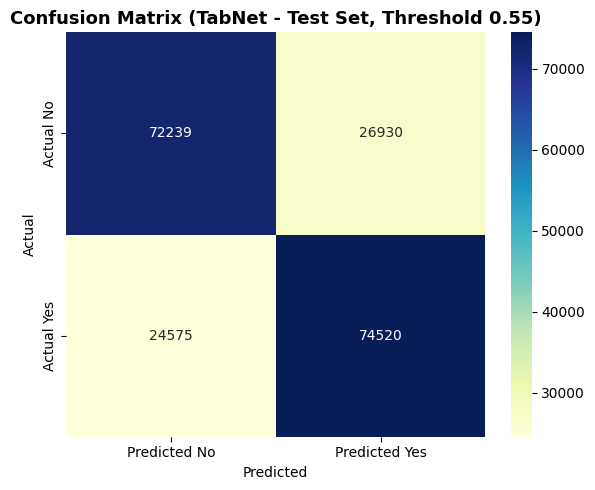

In [36]:
y_test_pred = (tabnet_model.predict_proba(X_test_np)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test_np, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test_np, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.55)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## Random Forest

Classification Report (Test Set)
              precision    recall  f1-score   support

          No       0.73      0.73      0.73     99169
         Yes       0.73      0.74      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



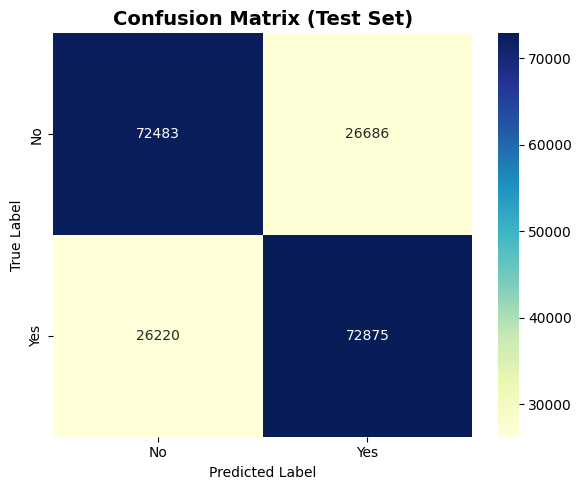

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_test_pred = model_rf.predict(X_test)
print("Classification Report (Test Set)")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analisis Hasil

## 🧪 Evaluation Results

| **Model**         | **Precision (No)** | **Recall (No)** | **F1 (No)** | **Precision (Yes)** | **Recall (Yes)** | **F1 (Yes)** | **Accuracy** |
| ----------------- | ------------------ | --------------- | ----------- | ------------------- | ---------------- | ------------ | ------------ |
| **Random Forest** | 0.73               | 0.73            | 0.73        | 0.73                | 0.74             | 0.73         | 0.73         |
| **TabNet**        | 0.75               | 0.73            | 0.74        | 0.73                | 0.75             | 0.74         | 0.74         |
| **CNN 1D**        | 0.75               | 0.73            | 0.74        | 0.73                | 0.75             | 0.74         | 0.74         |


## 📈 Insight & Analysis

* Random Forest sedikit tertinggal dibanding CNN dan TabNet, dengan semua metrik berada di angka 0.73.
* CNN 1D dan TabNet unggul tipis, masing-masing memperoleh 0.74 di hampir semua metrik.
* TabNet dan CNN memberikan performa setara dan lebih stabil dalam klasifikasi kedua kelas.
* Tidak ada model yang sangat unggul — semua model menunjukkan performansi baik dan seimbang.

